<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       IVSM Banking Customer Churn
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>Import the required libraries</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we import the required libraries, set environment variables and environment paths (if required).</p>

In [15]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd

import teradataml as tdml
import getpass
from teradataml import in_schema
from teradataml import DecisionForest, XGBoost, TrainTestSplit, DecisionForestPredict, XGBoostPredict, SentimentExtractor, ColumnTransformer, ScaleFit, OneHotEncodingFit
from teradataml import ColumnSummary, AutoML, AutoClassifier
from teradataml import RoundColumns, ClassificationEvaluator, ROC
from teradataml import (
    DataFrame
)
from teradataml import KMeans

from teradataml import SVM, SVMPredict
from teradataml import GridSearch, RandomSearch
from teradatasqlalchemy import BYTEINT

In [10]:
tdml.configure.val_install_location = "VAL_USER"

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>1. Initiate a connection to Vantage</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You will be prompted to provide the password. Enter your password, press the Enter key, and then use the down arrow to go to the next cell.</p>

In [12]:
# Change host and/or username as needed
engine = tdml.create_context(
    host='host.docker.internal',
    username='demo_user',
    password=getpass.getpass(prompt='Password:'),
    logmech="TD2",
    encryptdata=True,
    database='demo_user'
)

Password: ···········


<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>1.1 Confirmation for functions</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Before starting let us confirm that the required functions are installed.</p>

In [16]:
from IPython.display import display, Markdown

df_check= DataFrame.from_query('''select count(*) as cnt from dbc.tablesV where databasename = 'ivsm';''')
if df_check.get_values()[0][0] >= 10:
    print('Functions are installed, please continue.')
else:
    print('Functions are not installed, please go to Instalization notebook before proceeding further')
    display(Markdown("[Initialization Notebook](./IVSM_Banking_Customer_Churn_Model_Install.ipynb)"))

Functions are installed, please continue.


In [17]:
df = tdml.DataFrame('complaint_embeddings_store')

In [18]:
df.head()

id,txt,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16,emb_17,emb_18,emb_19,emb_20,emb_21,emb_22,emb_23,emb_24,emb_25,emb_26,emb_27,emb_28,emb_29,emb_30,emb_31,emb_32,emb_33,emb_34,emb_35,emb_36,emb_37,emb_38,emb_39,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,emb_50,emb_51,emb_52,emb_53,emb_54,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64,emb_65,emb_66,emb_67,emb_68,emb_69,emb_70,emb_71,emb_72,emb_73,emb_74,emb_75,emb_76,emb_77,emb_78,emb_79,emb_80,emb_81,emb_82,emb_83,emb_84,emb_85,emb_86,emb_87,emb_88,emb_89,emb_90,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99,emb_100,emb_101,emb_102,emb_103,emb_104,emb_105,emb_106,emb_107,emb_108,emb_109,emb_110,emb_111,emb_112,emb_113,emb_114,emb_115,emb_116,emb_117,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,emb_128,emb_129,emb_130,emb_131,emb_132,emb_133,emb_134,emb_135,emb_136,emb_137,emb_138,emb_139,emb_140,emb_141,emb_142,emb_143,emb_144,emb_145,emb_146,emb_147,emb_148,emb_149,emb_150,emb_151,emb_152,emb_153,emb_154,emb_155,emb_156,emb_157,emb_158,emb_159,emb_160,emb_161,emb_162,emb_163,emb_164,emb_165,emb_166,emb_167,emb_168,emb_169,emb_170,emb_171,emb_172,emb_173,emb_174,emb_175,emb_176,emb_177,emb_178,emb_179,emb_180,emb_181,emb_182,emb_183,emb_184,emb_185,emb_186,emb_187,emb_188,emb_189,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199,emb_200,emb_201,emb_202,emb_203,emb_204,emb_205,emb_206,emb_207,emb_208,emb_209,emb_210,emb_211,emb_212,emb_213,emb_214,emb_215,emb_216,emb_217,emb_218,emb_219,emb_220,emb_221,emb_222,emb_223,emb_224,emb_225,emb_226,emb_227,emb_228,emb_229,emb_230,emb_231,emb_232,emb_233,emb_234,emb_235,emb_236,emb_237,emb_238,emb_239,emb_240,emb_241,emb_242,emb_243,emb_244,emb_245,emb_246,emb_247,emb_248,emb_249,emb_250,emb_251,emb_252,emb_253,emb_254,emb_255,emb_256,emb_257,emb_258,emb_259,emb_260,emb_261,emb_262,emb_263,emb_264,emb_265,emb_266,emb_267,emb_268,emb_269,emb_270,emb_271,emb_272,emb_273,emb_274,emb_275,emb_276,emb_277,emb_278,emb_279,emb_280,emb_281,emb_282,emb_283,emb_284,emb_285,emb_286,emb_287,emb_288,emb_289,emb_290,emb_291,emb_292,emb_293,emb_294,emb_295,emb_296,emb_297,emb_298,emb_299,emb_300,emb_301,emb_302,emb_303,emb_304,emb_305,emb_306,emb_307,emb_308,emb_309,emb_310,emb_311,emb_312,emb_313,emb_314,emb_315,emb_316,emb_317,emb_318,emb_319,emb_320,emb_321,emb_322,emb_323,emb_324,emb_325,emb_326,emb_327,emb_328,emb_329,emb_330,emb_331,emb_332,emb_333,emb_334,emb_335,emb_336,emb_337,emb_338,emb_339,emb_340,emb_341,emb_342,emb_343,emb_344,emb_345,emb_346,emb_347,emb_348,emb_349,emb_350,emb_351,emb_352,emb_353,emb_354,emb_355,emb_356,emb_357,emb_358,emb_359,emb_360,emb_361,emb_362,emb_363,emb_364,emb_365,emb_366,emb_367,emb_368,emb_369,emb_370,emb_371,emb_372,emb_373,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
15567078,"Subject: Unresolved Issue with Online Banking System Dear team, I am writing to express an issue regarding your online platform which, despite its generally excellent performance, has been consistently failing to process my transactions lately. Even after several attempts, the problem still persists. I appreciate your exceptional service and request your prompt assistance to rectify this issue to maintain the quality of service. Sincerely, [Your Name]",-0.055459778755903244,-0.05258874222636223,-0.011410064063966274,-0.016612425446510315,-0.007658242713660002,-0.11577150225639343,-0.025689411908388138,0.015510627999901772,-0.00822208821773529,-0.008981306105852127,0.05524329096078873,-0.01164211519062519,0.02039453759789467,0.002269797259941697,0.04487515240907669,0.023172099143266678,0.021987630054354668,-0.08852377533912659,0.019013069570064545,0.037403661757707596,-0.012161673046648502,-0.0301983579993248,-0.028483005240559578,-0.014636642299592495,-0.0034988410770893097,0.021095559000968933,-0.01021075

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>2. Run K-Means on the Embeddings Store and then build final table with Cluster ID assignments to rows</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>K-means()</b> function groups a set of observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid). This algorithm minimizes the objective function, that is, the total Euclidean distance of all data points from the center of the cluster</p>

In [19]:
cols = list(df.columns)[2:]

KMeans_out = KMeans(id_column="id",
                    target_columns=cols,
                    data=df,
                    num_clusters=10,
                    output_cluster_assignment=True
                    )

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The output below shows cluster assignment for each row.</p>

In [20]:
clusters = KMeans_out.result

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's check how many data points each cluster has.</p>

In [21]:
clusters

id,td_clusterid_kmeans
15702912,3
15686436,3
15605804,6
15781586,3
15601026,3
15784148,9
15572158,3
15686974,1
15582129,5
15684865,1


In [22]:
merged_df = clusters.merge(df[['id','txt']], on='id', how='inner', lsuffix='_left', rsuffix='_right')

In [23]:
merged_df=merged_df.drop('id__left', axis=1)

In [24]:
##Code Added
pdf = pd.read_csv('bank_churn.csv')
tdml.copy_to_sql(pdf, table_name = 'bank_churn')

<p style = 'font-size:16px;font-family:Arial'>Create a "Virtual DataFrame" that points to the data set in Vantage.</p>
<p style = 'font-size:16px;font-family:Arial'><b><i>*Please scroll down to the end of the notebook for detailed column descriptions of the dataset.</i></b></p>

In [25]:
customer_churn = tdml.DataFrame(in_schema('demo_user','bank_churn'))

In [26]:
new_df = customer_churn.merge(merged_df[['id__right','td_clusterid_kmeans']],
                              on='customerid = id__right',
                              how='inner')
new_df

Unnamed: 0,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,id__right,td_clusterid_kmeans
27,15681697,Rueda,508,France,Male,31,8,72541.48,1,1,0,129803.08,0,15681697,0
36,15629617,Cook,572,Spain,Male,23,2,126873.52,1,0,1,67040.12,0,15629617,8
42,15642345,Y?,714,Germany,Female,49,4,93059.34,1,1,0,7571.51,1,15642345,9
44,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,15769959,3
52,15809906,Mitchell,558,Germany,Male,26,1,148853.29,2,1,1,24411.02,0,15809906,2
57,15585901,Johnson,717,Spain,Male,35,1,0.0,3,0,0,174770.14,1,15585901,1
8,15771270,North,635,France,Female,27,8,127471.56,1,1,1,152916.05,1,15771270,9
10,15773242,Chukwuhaenye,621,France,Male,32,1,0.0,2,1,1,168779.47,0,15773242,6
27,15681697,Rueda,508,France,Male,31,8,72541.48,1,1,0,129803.08,0,15681697,0
29,15667265,Cavenagh,729,France,Male,39,4,121404.64,1,1,1,159618.17,0,15667265,6


In [27]:
new_df = new_df.drop('id__right',axis=1)

In [28]:
new_df

Unnamed: 0,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,td_clusterid_kmeans
27,15681697,Rueda,508,France,Male,31,8,72541.48,1,1,0,129803.08,0,0
36,15629617,Cook,572,Spain,Male,23,2,126873.52,1,0,1,67040.12,0,8
42,15642345,Y?,714,Germany,Female,49,4,93059.34,1,1,0,7571.51,1,9
44,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,3
52,15809906,Mitchell,558,Germany,Male,26,1,148853.29,2,1,1,24411.02,0,2
57,15585901,Johnson,717,Spain,Male,35,1,0.0,3,0,0,174770.14,1,1
8,15771270,North,635,France,Female,27,8,127471.56,1,1,1,152916.05,1,9
10,15773242,Chukwuhaenye,621,France,Male,32,1,0.0,2,1,1,168779.47,0,6
27,15681697,Rueda,508,France,Male,31,8,72541.48,1,1,0,129803.08,0,0
29,15667265,Cavenagh,729,France,Male,39,4,121404.64,1,1,1,159618.17,0,6


<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial'>3. Data Transformation</b>

In [29]:
target_variable = "Exited"
numeric_columns = ["Age", "Balance", "CreditScore", "EstimatedSalary", "Tenure"]
categorical_columns = ["Gender", "Geography", "td_clusterid_kmeans", "NumOfProducts"]
binary_columns = ["HasCrCard", "IsActiveMember"]
id_column = ["CustomerId"]

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>ScaleFit()</b> function outputs statistics to input to ScaleTransform() function, which scales specified input DataFrame columns.<br>

In [30]:
fit1 = ScaleFit(data=new_df,
                target_columns=numeric_columns,
                scale_method="USTD",
                miss_value="KEEP",
                global_scale=False,
                multiplier="1")

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>OneHotEncodingFit </b>outputs a table of attributes and categorical values to input to OneHotEncodingTransform which encodes them as one-hot numeric vectors.</p>

In [31]:
fit2 = OneHotEncodingFit(data=new_df,
                         is_input_dense=True,
                         approach="auto",
                         target_column=categorical_columns[0:2],
                         category_counts=[2,3])

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>ColumnTransformer</b> function transforms the entire dataset in a single operation. You only need
to provide the FIT tables to the function, and the function runs all transformations that you require in a
single operation. Running all the it table transformations together in one-go gives approx. 30% performance improvement over running each transformation sequentially.</p>

In [32]:
new_table = ColumnTransformer(input_data=new_df,
                             onehotencoding_fit_data=fit2.result,
                             scale_fit_data=fit1.output).result

In [33]:
new_table=new_table[['CustomerId', 'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited', 'Gender', 'Geography', 'HasCrCard',
                     'IsActiveMember', 'NumOfProducts', 'Tenure', 'td_clusterid_kmeans', 'Gender_0', 'Gender_1', 'Geography_0',
                     'Geography_1', 'Geography_2']]

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.1 Train-Test Split</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>TrainTestSplit()</b> function divides the dataset into train and test subsets to be used for evaluating machine learning models and validation processes.<br>
80% is used for Training and 20% for validation.</p>

In [34]:
TrainTestSplit_out = TrainTestSplit(data = new_table,
                                    id_column='CustomerId',
                                    train_size=0.80,
                                    test_size=0.20,
                                    seed=3432)

In [35]:
TrainTestSplit_out.result.head()

TD_IsTrainRow,CustomerId,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,td_clusterid_kmeans,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,15773221,0.4394459715565384,0.06074553341410115,-0.7345602278929254,0.6159438401413989,1,Male,Spain,1,0,1,1.060761831595707,1,0,1,0,0,1
0,15594812,-0.17302228148393328,1.0059629187329149,1.6027557301929143,-0.4378593233325956,0,Female,Spain,0,1,2,-1.0300959179359102,3,1,0,0,0,1
0,15723873,-0.785490534524405,0.8003110530479506,0.08196936445147275,-0.026438704762598846,0,Male,Spain,0,0,1,-0.6816196263473073,3,0,1,0,0,1
0,15638513,0.13321184503630257,1.0884175717217004,0.7556062781356012,-1.0869037149543959,0,Female,France,0,0,2,0.7122855400071041,2,1,0,1,0,0
0,15746203,2.3789287728513657,0.7131834860149678,-0.9591058657876349,-0.991194980289124,1,Male,Germany,0,1,1,-0.3331433347587045,5,0,1,0,1,0
0,15800524,-0.989646618871229,1.7809519997551344,0.37796134167631706,-0.6219204185561422,0,Male,Germany,1,0,1,-0.6816196263473073,0,0,1,0,1,0
0,15585533,-0.27510032365734527,1.1678416383263217,0.30651500234618223,1.258680974242341,0,Male,France,0,1,1,0.36380924841850126,4,0,1,1,0,0
0,15687001,1.56230443546407,0.7738777861024132,-0.5406344497111308,0.34845887768867684,1,Male,Germany,1,1,1,-1.3785722095245132,6,0,1,0,1,0
0,15580068,-0.3771783658307572,-1.2382178944926896,-1.2550978430124793,0.09212542280892035,0,Male,Spain,1,1,2,0.015332956829898384,1,0,1,0,0,1
0,15567078,-1.193802703218053,-0.1600216424454045,1.4292431918197297,-0.3641490722156825,0,Female,France,1,1,1,1.060761831595707,0,1,0,1,0,0


In [36]:
df_train = TrainTestSplit_out.result[TrainTestSplit_out.result['TD_IsTrainRow'] == 1].drop(['TD_IsTrainRow'], axis = 1)
df_test = TrainTestSplit_out.result[TrainTestSplit_out.result['TD_IsTrainRow'] == 0].drop(['TD_IsTrainRow'], axis = 1)

print("Training Set = " + str(df_train.shape[0]) + ". Testing Set = " + str(df_test.shape[0]))

Training Set = 2400. Testing Set = 600


In [37]:
tdml.copy_to_sql(df_train, table_name = 'clean_data_train1', if_exists = 'replace')
tdml.copy_to_sql(df_test, table_name = 'clean_data_test1', if_exists = 'replace')

In [38]:
df_train = tdml.DataFrame(in_schema('demo_user','clean_data_train1'))

In [39]:
df_test = tdml.DataFrame(in_schema('demo_user','clean_data_test1'))

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>4. Modelling</b></p>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.1 Train an XGBoost Model</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>XGBoost()</b> function is an efficient implementation of gradient boosting for classification and regression tasks. It builds an ensemble of decision trees in a sequential manner to minimize prediction error.</p>


In [40]:
formula_str = "Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Gender_0 + Gender_1 + Geography_0 + Geography_1 + Geography_2 + td_clusterid_kmeans"

In [41]:
XGBoost_out2 = XGBoost(data=df_train,
                       id_column='CustomerId',
                       loss_function='logistic',
                       formula = formula_str,
                       iter_num=5,
                       min_node_size=1,
                       #num_boosted_trees=50,                       
                       num_boosted_trees=80,
                       lambda1 = 500,
                       shrinkage_factor=0.5,
                       max_depth=10)

In [42]:
XGBoost_out2.result

task_index,tree_num,iter,tree_order,regression_tree
0,1,2,0,"{""id_"":1,""sum_"":4.983129,""sumSq_"":4.966322,""size_"":20,""maxDepth_"":10,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":0.194242,""attr_"":""CreditScore"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":1.517485,""scoreImprove_"":1.517485,""leftNodeSize_"":11,""rightNodeSize_"":9},""leftChild_"":{""id_"":2,""sum_"":0.000000,""sumSq_"":0.000000,""size_"":11,""maxDepth_"":0,""value_"":0.000000,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000000},""rightChild_"":{""id_"":3,""sum_"":4.983129,""sumSq_"":4.966322,""size_"":9,""maxDepth_"":9,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":0.592563,""attr_"":""Age"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":1.408854,""scoreImprove_"":1.408854,""leftNodeSize_"":5,""rightNodeSize_"":4},""leftChild_"":{""id_"":6,""sum_"":0.999002,""sumSq_"":0.998005,""size_"":5,""maxDepth_"":8,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":-0.173022,""attr_"":""Age"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":0.299401,""scoreImprove_"":0.299401,""leftNodeSize_"":3,""rightNodeSize_"":2},""leftChild_"":{""id_"":12,""sum_"":0.000000,""sumSq_"":0.000000,""size_"":3,""maxDepth_"":0,""value_"":0.000000,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000000},""rightChild_"":{""id_"":13,""sum_"":0.999002,""sumSq_"":0.998005,""size_"":2,""maxDepth_"":7,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":0.515751,""attr_"":""CreditScore"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":0.499002,""scoreImprove_"":0.499002,""leftNodeSize_"":1,""rightNodeSize_"":1},""leftChild_"":{""id_"":26,""sum_"":0.000000,""sumSq_"":0.000000,""size_"":1,""maxDepth_"":0,""value_"":0.000000,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000000},""rightChild_"":{""id_"":27,""sum_"":0.999002,""sumSq_"":0.998005,""size_"":1,""maxDepth_"":0,""value_"":0.999002,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000997}}},""rightChild_"":{""id_"":7,""sum_"":3.984127,""sumSq_"":3.968317,""size_"":4,""maxDepth_"":0,""value_"":0.996032,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.003953}}}"
0,1,3,0,"{""id_"":1,""sum_"":4.966322,""sumSq_"":4.932899,""size_"":20,""maxDepth_"":10,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":0.194242,""attr_"":""CreditScore"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":1.507266,""scoreImprove_"":1.507266,""leftNodeSize_"":11,""rightNodeSize_"":9},""leftChild_"":{""id_"":2,""sum_"":0.000000,""sumSq_"":0.000000,""size_"":11,""maxDepth_"":0,""value_"":0.000000,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000000},""rightChild_"":{""id_"":3,""sum_"":4.966322,""sumSq_"":4.932899,""size_"":9,""maxDepth_"":9,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":0.592563,""attr_"":""Age"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":1.395604,""scoreImprove_"":1.395604,""leftNodeSize_"":5,""rightNodeSize_"":4},""leftChild_"":{""id_"":6,""sum_"":0.998005,""sumSq_"":0.996014,""size_"":5,""maxDepth_"":8,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":-0.173022,""attr_"":""Age"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":0.298804,""scoreImprove_"":0.298804,""leftNodeSize_"":3,""rightNodeSize_"":2},""leftChild_"":{""id_"":12,""sum_"":0.000000,""sumSq_"":0.000000,""size_"":3,""maxDepth_"":0,""value_"":0.000000,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000000},""rightChild_"":{""id_"":13,""sum_"":0.998005,""sumSq_"":0.996014,""size_"":2,""maxDepth_"":7,""nodeType_"":""REGRESSION_NODE"",""split_"":{""splitValue_"":0.515751,""attr_"":""CreditScore"",""type_"":""REGRESSION_NUMERIC_SPLIT"",""score_"":0.498007,""scoreImprove_"":0.498007,""leftNodeSize_"":1,""rightNodeSize_"":1},""leftChild_"":{""id_"":26,""sum_"":0.000000,""sumSq_"":0.000000,""size_"":1,""maxDepth_"":0,""value_"":0.000000,""nodeType_"":""REGRESSION_LEAF"",""prediction_"":0.000000},""rightChild_"":{""id_"":27,""sum_"":0.998005,""sumS

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Predict Labels using the XGBoost Model</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>XGBoostPredict()</b> function is used to predict the target labels for the test dataset (<b>df_test</b>) based on the trained XGBoost model. </p>

In [43]:
XGBoostPredict_out_1 = XGBoostPredict(newdata=df_test,
                                      object=XGBoost_out2.result,
                                      id_column='CustomerId',
                                     accumulate='Exited')

In [44]:
XGBoostPredict_out_1.result

CustomerId,Prediction,Confidence_Lower,Confidence_upper,Exited
15568487,0.0008614124999999998,-0.00010192120166108468,0.0018247462016610845,0
15569892,0.0014557874999999994,0.0003308276094161728,0.002580747390583826,0
15571756,0.0009246625,4.413802814448868e-05,0.0018051869718555113,0
15572626,0.003198499999999999,0.0009946861126762505,0.005402313887323748,0
15574910,0.009774949999999994,0.006610569527238797,0.01293933047276119,0
15575438,0.0026506999999999998,0.00045624851943472204,0.0048451514805652775,0
15567078,0.0020091249999999996,0.0006908578123123671,0.003327392187687632,0
15567446,0.0034092000000000003,0.001420058881366208,0.005398341118633793,0
15567446,0.0034092000000000003,0.001420058881366208,0.005398341118633793,0
15568044,0.0011490249999999993,0.00020212896146733726,0.002095921038532661,0


In [45]:

predict_df = XGBoostPredict_out_1.result
predict_df = predict_df.assign(Prediction = predict_df.Prediction.cast(type_ = BYTEINT))
predict_df.head()

CustomerId,Prediction,Confidence_Lower,Confidence_upper,Exited
15567446,0,0.001420058881366208,0.005398341118633793,0
15568044,0,0.00020212896146733726,0.002095921038532661,0
15568240,0,0.001503098842505967,0.005138501157494028,0
15568240,0,0.001503098842505967,0.005138501157494028,0
15568506,0,0.0015477090635859676,0.005050490936414029,0
15568834,0,3.215271283466827e-05,0.0010336972871653315,0
15568487,0,-0.00010192120166108468,0.0018247462016610845,0
15567486,0,0.0013780822172935465,0.006094592782706449,0
15567446,0,0.001420058881366208,0.005398341118633793,0
15567078,0,0.0006908578123123671,0.003327392187687632,0


<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>5. Evaluate the Model</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> <b>ClassificationEvaluator()</b> function evaluates and emits various metrics of classification model based on its predictions on the data. Apart from accuracy, the secondary output data returns micro, macro, and weighted-averaged metrics of precision, recall, and F1-score values.<br>
This is a powerful function, and doesn't move data outside Vantage.

In [46]:
ClassificationEvaluator_obj = ClassificationEvaluator(data=predict_df,
                                                          observation_column='Exited',
                                                          prediction_column='Prediction',
                                                          labels=['0', '1'])
classeval_decisiondf = ClassificationEvaluator_obj.output_data
classeval_decisiondf

SeqNum,Metric,MetricValue
3,Micro-Recall,0.8216666666666667
5,Macro-Precision,0.41083333333333333
6,Macro-Recall,0.5
7,Macro-F1,0.4510521500457456
9,Weighted-Recall,0.8216666666666667
10,Weighted-F1,0.741229033241842
8,Weighted-Precision,0.675136111111111
4,Micro-F1,0.8216666666666667
2,Micro-Precision,0.8216666666666667
1,Accuracy,0.8216666666666667


<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>5.1 Compute ROC Curve</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>ROC()</b> function calculates the Receiver Operating Characteristic (ROC) curve to evaluate the performance of the model, using the predicted probabilities and the actual class labels.

In [47]:
roc_df = ROC(data = predict_df, 
                    probability_column = "Prediction",
                    observation_column = "Exited",
                    positive_class="1"
                    )
roc_df.output_data

threshold_value,tpr,fpr
0.04081632653061224,0.0,0.0
0.08163265306122448,0.0,0.0
0.1020408163265306,0.0,0.0
0.12244897959183673,0.0,0.0
0.16326530612244897,0.0,0.0
0.18367346938775508,0.0,0.0
0.14285714285714285,0.0,0.0
0.061224489795918366,0.0,0.0
0.02040816326530612,0.0,0.0
0.0,1.0,1.0


In [48]:
auc = roc_df.result.get_values()[0][0]
auc

0.5

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>5.2 Plot ROC Curve</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Plots the ROC curve using fpr (False Positive Rate) and tpr (True Positive Rate) from the ROC data, and displays the Area Under the Curve (AUC) for model evaluation.

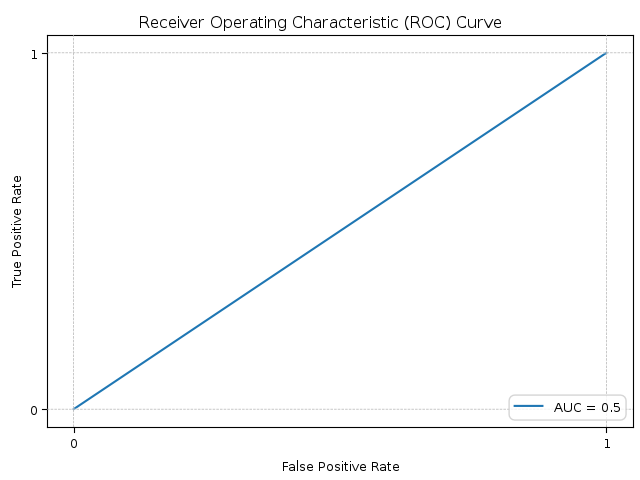

In [49]:
plot_roc_df = roc_df.output_data
plot =  plot_roc_df.plot(x=plot_roc_df.fpr, y=plot_roc_df.tpr,
                         title="Receiver Operating Characteristic (ROC) Curve",
                         xlabel='False Positive Rate', 
                         ylabel='True Positive Rate', 
                         color="blue",
                         legend=f'AUC = {round(auc, 4)}',
                         legend_style='lower right',
                         grid_linestyle='--',
                         grid_linewidth=0.5)
 
# Display the plot.
plot.show()

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>5.3 Define Model Parameters</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Sets the parameters for the classification model, including input columns, response column, hyperparameters (e.g., max_depth, lambda1), and other settings such as shrinkage_factor, seed, and iter_num.

In [50]:
model_params = {"input_columns":['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_0','Gender_1','Geography_0','Geography_1','Geography_2','td_clusterid_kmeans'],
                    "response_column" :'Exited',
                    "max_depth":(5,10,15),
                    "lambda1" :(1000.0,0.001),
                    "model_type" :"Classification",
                    "seed":32,
                    "shrinkage_factor":0.1,
                    "iter_num":(5, 50)}

In [51]:
eval_params = {"id_column": "CustomerId",
               "accumulate":"Exited",
               "model_type":'Classification',
               "object_order_column":['task_index', 'tree_num', 'iter','class_num', 'tree_order']}

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>GridSearch</b> is an exhaustive search algorithm that covers all possible parameter values to identify optimal hyperparameters. It works for teradataml analytic functions from SQLE, BYOM, VAL and UAF features.teradataml GridSearch allows user to perform hyperparameter tuning for all model trainer and non-model trainer functions.

In [52]:

gs_obj = GridSearch(func=XGBoost, params=model_params)

In [53]:
gs_obj.fit(data=df_train, verbose=2, run_parallel=True, evaluation_metric='Accuracy', **eval_params)

Model_id:XGBOOST_1 - Run time:28.361s - Status:PASS - ACCURACY:0.19                
Model_id:XGBOOST_2 - Run time:30.302s - Status:PASS - ACCURACY:0.79                
Model_id:XGBOOST_3 - Run time:35.937s - Status:PASS - ACCURACY:0.852                
Model_id:XGBOOST_0 - Run time:36.434s - Status:PASS - ACCURACY:0.19                 
Model_id:XGBOOST_4 - Run time:26.536s - Status:PASS - ACCURACY:0.19                 
Model_id:XGBOOST_6 - Run time:19.359s - Status:PASS - ACCURACY:0.908                
Model_id:XGBOOST_5 - Run time:32.255s - Status:PASS - ACCURACY:0.19                 
Model_id:XGBOOST_7 - Run time:35.822s - Status:PASS - ACCURACY:0.823                
Model_id:XGBOOST_9 - Run time:30.042s - Status:PASS - ACCURACY:0.19                 
Model_id:XGBOOST_8 - Run time:33.802s - Status:PASS - ACCURACY:0.19                 
Model_id:XGBOOST_10 - Run time:24.933s - Status:PASS - ACCURACY:0.908                
Model_id:XGBOOST_11 - Run time:21.697s - Status:PASS - ACCURACY:0.

In [54]:
gs_obj.models

,MODEL_ID,DATA_ID,PARAMETERS,STATUS,ACCURACY
0,XGBOOST_1,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.189583
1,XGBOOST_2,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.789583
2,XGBOOST_3,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.852083
3,XGBOOST_0,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.189583
4,XGBOOST_4,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.189583
5,XGBOOST_6,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.908333
6,XGBOOST_5,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.189583
7,XGBOOST_7,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.822917
8,XGBOOST_9,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.189583
9,XGBOOST_8,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.189583


In [55]:
gs_obj.model_stats

,MODEL_ID,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,XGBOOST_1,0.189583,0.189583,0.189583,0.189583,0.094792,0.500000,0.159370,0.035942,0.189583,0.060428
1,XGBOOST_2,0.789583,0.789583,0.789583,0.789583,0.692410,0.756533,0.710393,0.834359,0.789583,0.804412
2,XGBOOST_3,0.852083,0.852083,0.852083,0.852083,0.759624,0.753001,0.756221,0.850258,0.852083,0.851128
3,XGBOOST_0,0.189583,0.189583,0.189583,0.189583,0.094792,0.500000,0.159370,0.035942,0.189583,0.060428
4,XGBOOST_4,0.189583,0.189583,0.189583,0.189583,0.094792,0.500000,0.159370,0.035942,0.189583,0.060428
5,XGBOOST_6,0.908333,0.908333,0.908333,0.908333,0.869630,0.817170,0.839762,0.904580,0.908333,0.904839
6,XGBOOST_5,0.189583,0.189583,0.189583,0.189583,0.094792,0.500000,0.159370,0.035942,0.189583,0.060428
7,XGBOOST_7,0.822917,0.822917,0.822917,0.822917,0.709776,0.697124,0.703003,0.817840,0.822917,0.820165
8,XGBOOST_9,0.189583,0.189583,0.189583,0.189583,0.094792,0.500000,0.159370,0.035942,0.189583,0.060428
9,XGBOOST_8,0.189583,0.189583,0.189583,0.189583,0.094792,0.500000,0.159370,0.035942,0.189583,0.060428


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Function uses model training function generated models from SQLE, 
    VAL and UAF features for predictions. Predictions are made using 
    the best trained model. Predict function is not supported for
    non-model trainer function.

In [56]:
gs_pred = gs_obj.predict(newdata=df_test, **eval_params)

In [57]:
print("Prediction Result: ", gs_pred.result)

Prediction Result:     CustomerId  Prediction  Confidence_Lower  Confidence_upper  Exited
0    15568487           0          1.000000          1.000000       0
1    15569892           0          0.666667          0.666667       0
2    15571756           0          1.000000          1.000000       0
3    15572626           0          0.666667          0.666667       0
4    15574910           1          0.666667          0.666667       0
5    15575438           0          1.000000          1.000000       0
6    15567078           0          1.000000          1.000000       0
7    15567446           0          0.666667          0.666667       0
8    15567446           0          0.666667          0.666667       0
9    15568044           0          1.000000          1.000000       0


In [58]:
gs_obj.best_params_

{'input_columns': ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Gender_0',
  'Gender_1',
  'Geography_0',
  'Geography_1',
  'Geography_2',
  'td_clusterid_kmeans'],
 'response_column': 'Exited',
 'max_depth': 10,
 'lambda1': 0.001,
 'model_type': 'Classification',
 'seed': 32,
 'shrinkage_factor': 0.1,
 'iter_num': 5,
 'data': '"DEMO_USER"."ml__select__1746632216939217"'}

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>SVM()</b> function is a linear support vector machine (SVM) that performs classification and regression analysis on data sets.

In [59]:
obj2 = SVM(data=df_train,
              input_columns=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard',
                                              'IsActiveMember','EstimatedSalary',
                                              'Gender_0','Gender_1','Geography_0','Geography_1','Geography_2','td_clusterid_kmeans'],
              response_column="Exited",
              model_type="Classification",
              batch_size=12,
              iter_max=301,
              lambda1=0.1,
              alpha=0.5,
              iter_num_no_change=60,
              tolerance=0.01,
              intercept=False,
              class_weights="0:1.0,1:0.5",
              learning_rate="INVTIME",
              initial_data=0.5,
              decay_rate=0.5,
              momentum=0.6,
              nesterov=True,
              local_sgd_iterations=1,
              )

In [60]:
 # Print the result DataFrame.
print(obj2.result)
print(obj2.output_data)

   attribute        predictor  estimate value
0          2              Age  0.059139  None
1          4          Balance  0.000000  None
2          5    NumOfProducts -0.357400  None
3          6        HasCrCard -0.121866  None
4          8  EstimatedSalary  0.000000  None
5          9         Gender_0 -0.061264  None
6          7   IsActiveMember -0.102361  None
7          3           Tenure  0.000000  None
8          1      CreditScore  0.000000  None
9          0     (Intercept)   0.000000  None
   iterNum      loss       eta  bias
0        3  0.601999  0.028868   0.0
1        5  0.841418  0.022361   0.0
2        6  0.594996  0.020412   0.0
3        7  0.300842  0.018898   0.0
4        9  0.750404  0.016667   0.0
5       10  1.642324  0.015811   0.0
6        8  0.106061  0.017678   0.0
7        4  0.444714  0.025000   0.0
8        2  0.576068  0.035355   0.0
9        1  1.000000  0.050000   0.0


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>SVMPredict()</b> function uses the model generated by the function SVM() to predict target values (regression) and class labels (classification) on new input data.

In [61]:
SVMPredict_out2 = SVMPredict(object = obj2,
                                newdata = df_test,
                                id_column = "CustomerId",
                                accumulate = "Exited",
                                output_prob = True,
                                output_responses = ["0", "1"]
                                )

In [62]:
SVMPredict_out2.result

CustomerId,prediction,prob_0,prob_1,Exited
15568487,0,0.7341143775852599,0.2658856224147401,0
15569892,0,0.7341143775852599,0.2658856224147401,0
15571756,0,0.6851570220046456,0.31484297799535443,0
15572626,0,0.7334055623178628,0.2665944376821372,0
15574910,0,0.7417726813547428,0.25822731864525716,0
15575438,0,0.7409374560478166,0.2590625439521835,0
15567078,0,0.6917825718831632,0.3082174281168368,0
15567446,0,0.7410602855507196,0.25893971444928043,0
15567446,0,0.7410602855507196,0.25893971444928043,0
15568044,0,0.8534301797079431,0.14656982029205687,0


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The <b>ClassificationEvaluator()</b> function evaluate and emits various metrics of classification model based on its predictions on the data.

In [63]:
ClassificationEvaluator_obj = ClassificationEvaluator(data=SVMPredict_out2.result,
                                                          observation_column='Exited',
                                                          prediction_column='prediction',
                                                          labels=['0', '1'])
classeval_decisiondf = ClassificationEvaluator_obj.output_data
classeval_decisiondf

SeqNum,Metric,MetricValue
3,Micro-Recall,0.8216666666666667
5,Macro-Precision,0.41083333333333333
6,Macro-Recall,0.5
7,Macro-F1,0.4510521500457456
9,Weighted-Recall,0.8216666666666667
10,Weighted-F1,0.741229033241842
8,Weighted-Precision,0.675136111111111
4,Micro-F1,0.8216666666666667
2,Micro-Precision,0.8216666666666667
1,Accuracy,0.8216666666666667


In [64]:
model_params_2 = {"input_columns": ['CreditScore','Age', 'Tenure','Balance',
                                    'NumOfProducts','HasCrCard','IsActiveMember',
                                    'EstimatedSalary','Gender_0','Gender_1',
                                    'Geography_0','Geography_1','Geography_2',
                                    'td_clusterid_kmeans'],
                  "response_column":"Exited",
                  "model_type":"Classification",
                  "batch_size":(11, 50, 75),
                  "iter_max":(100, 301),
                  "intercept":False,
                  "learning_rate":("ADAPTIVE","INVTIME"),
                  "nesterov_optimization":(True,False),
                  "local_sgd_iterations":1}

In [65]:
eval_params_2 = {"id_column": "CustomerId",
                "accumulate": "Exited"}

In [66]:
gs_obj2 = GridSearch(func=SVM, params=model_params_2)
gs_obj2.fit(data=df_train, verbose=2, run_parallel=True, evaluation_metric='Accuracy', **eval_params_2)

Model_id:SVM_0 - Run time:34.499s - Status:PASS - ACCURACY:0.812                   
Model_id:SVM_3 - Run time:43.565s - Status:PASS - ACCURACY:0.769                   
Model_id:SVM_2 - Run time:43.728s - Status:PASS - ACCURACY:0.769                   
Model_id:SVM_1 - Run time:43.927s - Status:PASS - ACCURACY:0.812                    
Model_id:SVM_14 - Run time:37.559s - Status:PASS - ACCURACY:0.808                    
Model_id:SVM_15 - Run time:34.865s - Status:PASS - ACCURACY:0.808                    
Model_id:SVM_16 - Run time:30.881s - Status:PASS - ACCURACY:0.81                     
Model_id:SVM_18 - Run time:34.341s - Status:PASS - ACCURACY:0.81                     
Model_id:SVM_17 - Run time:40.889s - Status:PASS - ACCURACY:0.81                     
Model_id:SVM_19 - Run time:26.829s - Status:PASS - ACCURACY:0.81                     
Model_id:SVM_20 - Run time:42.276s - Status:PASS - ACCURACY:0.81                     
Model_id:SVM_21 - Run time:30.763s - Status:PASS - ACCURACY:0

In [67]:
gs_obj2.models

,MODEL_ID,DATA_ID,PARAMETERS,STATUS,ACCURACY
0,SVM_0,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.812500
1,SVM_3,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.768750
2,SVM_2,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.768750
3,SVM_1,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.812500
4,SVM_6,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.785417
5,SVM_5,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.812500
6,SVM_4,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.812500
7,SVM_7,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.785417
8,SVM_9,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.810417
9,SVM_8,DF_0,"{'input_columns': ['CreditScore', 'Age', 'Tenu...",PASS,0.810417


In [68]:
gs_obj2.set_model(model_id='SVM_20')

In [69]:
gs_pred2 = gs_obj2.predict(newdata=df_test, **eval_params_2)

In [70]:
print("Prediction Result: ", gs_pred2.result)

Prediction Result:     CustomerId  prediction  Exited
0    15567446           0       0
1    15568240           0       0
2    15568506           0       0
3    15568834           0       0
4    15570379           0       1
5    15570485           0       0
6    15567486           0       0
7    15568240           0       0
8    15568487           0       0
9    15569423           0       0


In [71]:
gs_obj2.best_params_

{'input_columns': ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Gender_0',
  'Gender_1',
  'Geography_0',
  'Geography_1',
  'Geography_2',
  'td_clusterid_kmeans'],
 'response_column': 'Exited',
 'model_type': 'Classification',
 'batch_size': 11,
 'iter_max': 100,
 'intercept': False,
 'learning_rate': 'ADAPTIVE',
 'nesterov_optimization': True,
 'local_sgd_iterations': 1,
 'data': '"DEMO_USER"."ml__select__1746633353719122"'}

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>6. Cleanup</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The following code will remove the context.</p>

In [72]:
tdml.remove_context()

True

<hr style="height:1px;border:none;">
<b style = 'font-size:18px;font-family:Arial'>Dataset:</b>

- `Unnamed`: Unnamed
- `CustomerId`: Customer ID
- `Surname`: Surname
- `CreditScore`: Credit score
- `Geography`: Country (Germany / France / Spain)
- `Gender`: Gender (Female / Male)
- `Age`: Age
- `Tenure`: No of years the customer has been associated with the bank
- `Balance`: Balance
- `NumOfProducts`: No of bank products used
- `HasCrCard`: Credit card status (0 = No, 1 = Yes)
- `IsActiveMember`: Active membership status (0 = No, 1 = Yes)
- `EstimatedSalary`: Estimated salary
- `Exited`: Abandoned or not? (0 = No, 1 = Yes)

<p style = 'font-size:16px;font-family:Arial'><b>Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li>Teradataml Python reference: <a href = 'https://docs.teradata.com/search/all?query=Python+Package+User+Guide&content-lang=en-US'>here</a></li>
    <li>KMeans reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-TRAINING-functions/KMeans'>here</a></li>
    <li>KMeansPredict reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-SCORING-functions/KMeansPredict'>here</a></li>
    <li>SVM reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-TRAINING-functions/SVM'>here</a></li>
    <li>SVMPredict reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-SCORING-functions/SVMPredict'>here</a></li>
    <li>XGBoost reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-TRAINING-functions/XGBoost'>here</a></li>
    <li>XGBoostPredict reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-SCORING-functions/XGBoostPredict'>here</a></li>
    <li>ScaleFit reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/FEATURE-ENGINEERING-TRANSFORM-functions/ScaleFit'>here</a></li>
    <li>OneHotEncodingFit reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/FEATURE-ENGINEERING-TRANSFORM-functions/OneHotEncodingFit'>here</a></li>
    <li>TrainTestSplit reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-EVALUATION-functions/TrainTestSplit'>here</a></li>
    <li>ClassificationEvaluator reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-EVALUATION-functions/ClassificationEvaluator'>here</a></li>
    <li>ColumnTransformer reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/FEATURE-ENGINEERING-TRANSFORM-functions/ColumnTransformer'>here</a></li>
    <li>ROC reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-Python-Function-Reference-17.20/teradataml-Analytic-Database-17.20.xx-Analytic-Functions/MODEL-EVALUATION-functions/ROC'>here</a></li>
</ul>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2025. All Rights Reserved
        </div>
    </div>
</footer>